In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(109)
heights_men = np.random.normal(5.75, 0.25, size=90)
heights_women = np.random.normal(5.25, 0.25, size=90)
x = np.concatenate([heights_men, heights_women])

Normal PDF.

Plugging in one $x$ value into the PDF gives me the probability density for a given observation under that particular parameterization of the Normal (e.g., mean=5.5 std=0.25)

In [3]:
stats.norm.pdf(6, loc=5.5, scale=0.25)

0.21596386605275225

I could plot the probability densities across a range of possible $x$ values to see the density curve that you probably associate with the PDF.

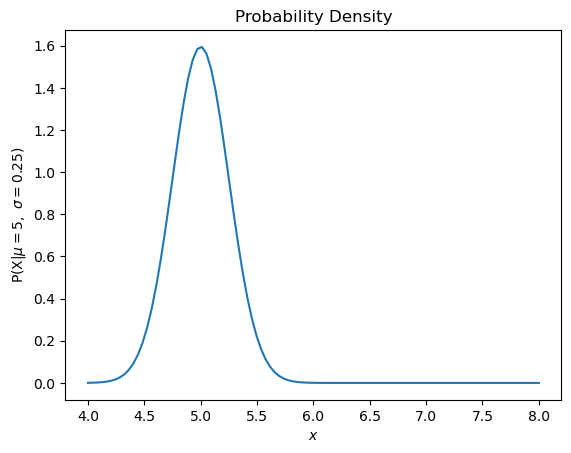

In [4]:
x_lin = np.linspace(4,8,100)
prob_densities = stats.norm.pdf(x_lin, loc=5, scale=0.25)
plt.plot(x_lin, prob_densities)
plt.xlabel('$x$')
plt.ylabel("P(X|$\\mu=5,\ \\sigma=0.25)$");
plt.title('Probability Density');

You could also compute the joint probability. Assuming the observations are independent, this would just be the product of their individual densities.

In [5]:
np.prod([stats.norm.pdf(x, loc=5, scale=0.25)])

2.6279786102023523e-210

This joint probability of all the data when viewed as a function of the distribution parameter(s), holding the data *fixed*, is called the likelihood.

Here we vary only $\mu$ so we can show this as a 2D plot. Here it appears that $\mu \approx 5.55$ is the mostly likely mean of the data generating distrbution given the observed data and assuming that we know $\sigma$ to be 0.25.

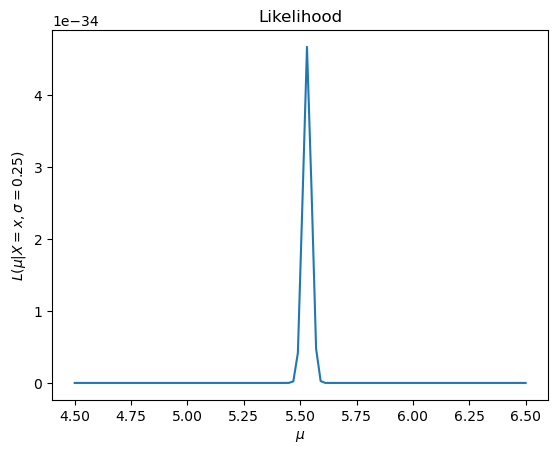

In [6]:
mus = np.linspace(4.5, 6.5, 100)
likelihoods = [np.prod([stats.norm.pdf(x, loc=mu, scale=0.25)]) for mu in mus]
plt.plot(mus, likelihoods)
plt.xlabel('$\\mu$')
plt.ylabel('$L(\\mu|X=x, \\sigma = 0.25)$')
plt.title("Likelihood");

/home/chris/micromamba/envs/cs109b/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


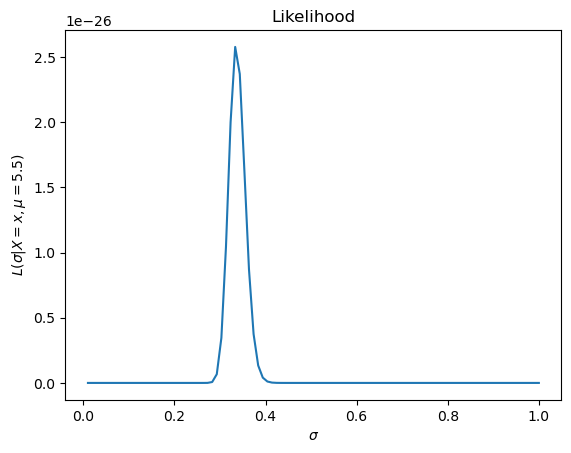

In [7]:
sigmas = np.linspace(0, 1, 100)
likelihoods = [np.prod([stats.norm.pdf(x, loc=5.5, scale=sigma)]) for sigma in sigmas]
plt.plot(sigmas, likelihoods)
plt.xlabel('$\\sigma$')
plt.ylabel('$L(\\sigma|X=x, \\mu = 5.5)$')
plt.title("Likelihood");

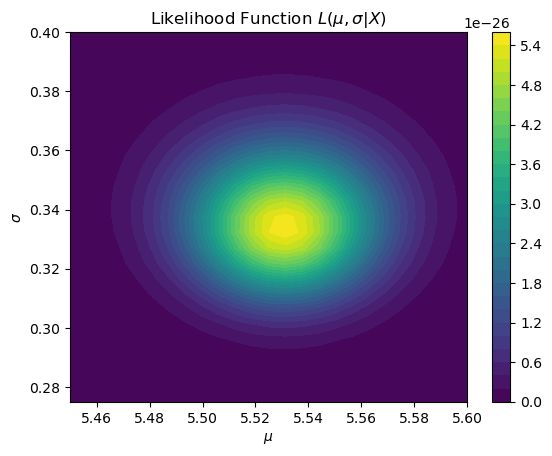

In [8]:
mus = np.linspace(5.45, 5.6, 25)  # Range of mu values
sigmas = np.linspace(0.275, 0.4, 25)  # Range of sigma values
Mu, Sigma = np.meshgrid(mus, sigmas)  # Create a meshgrid for mu and sigma

# Calculate the likelihood for each (mu, sigma) pair
Likelihoods = np.zeros(Mu.shape)
for i in range(Mu.shape[0]):
    for j in range(Mu.shape[1]):
        mu = Mu[i, j]
        sigma = Sigma[i, j]
        # Calculate the product of PDFs for the current mu and sigma
        likelihood = np.prod([stats.norm.pdf(x_i, loc=mu, scale=sigma) for x_i in x])
        Likelihoods[i, j] = likelihood

# Plot the contour plot
contour = plt.contourf(Mu, Sigma, Likelihoods, levels=30, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('$\\mu$')
plt.ylabel('$\\sigma$')
plt.title('Likelihood Function $L(\\mu, \\sigma|X)$');

Multiplying all these small numbers together result in a very small product which can potentially cause an underflow problem. So we normally work with the **log-loglikelihood**. The log of the product becomes a sum of the logs.

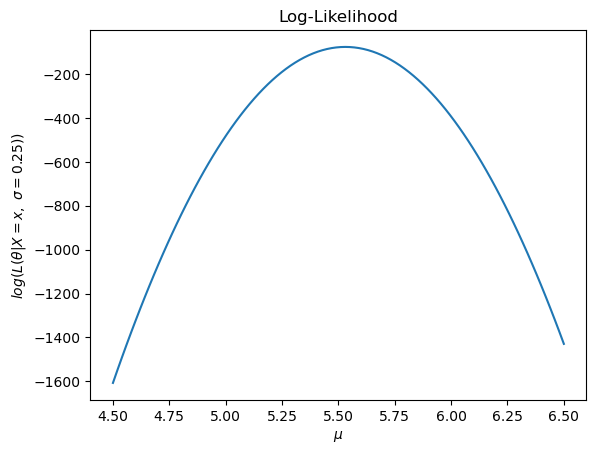

In [9]:
mus = np.linspace(4.5, 6.5, 100)
log_likelihoods = [np.sum([np.log(stats.norm.pdf(x, loc=mu, scale=0.25))]) for mu in mus]
plt.plot(mus, log_likelihoods)
plt.xlabel('$\\mu$')
plt.ylabel('$log(L(\\theta|X=x,\ \\sigma=0.25))$')
plt.title("Log-Likelihood");